In [719]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Downloads/D1(1).csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 37 columns):
encounter_id                51766 non-null int64
patient_nbr                 51766 non-null int64
race                        51766 non-null object
gender                      51766 non-null object
age                         51766 non-null object
weight                      51766 non-null object
admission_type_id           51766 non-null int64
discharge_disposition_id    51766 non-null int64
admission_source_id         51766 non-null int64
time_in_hospital            51766 non-null int64
payer_code                  51766 non-null object
medical_specialty           51766 non-null object
num_lab_procedures          51766 non-null int64
num_procedures              51766 non-null int64
num_medications             51766 non-null int64
number_outpatient           51766 non-null int64
number_emergency            51766 non-null int64
number_inpatient            51766 non-null int64
dia

In [720]:
df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)
# these are categorical data so I changed them to strings 

In [721]:
df['admission_type_id'].unique()
#done this to demonstrate its now a string

array(['2', '3', '1', '5', '6', '8', '7', '4'], dtype=object)

In [722]:
for col in df:
    print(df[col].unique())
#for loop to display all unique vaues so we can see what colomns have missing data.

[150645834 150646782 150659562 ... 443854148 443857166 443867222]
[ 66173058 104923647  30917367 ... 140199494 120975314 175429310]
['Caucasian' 'AfricanAmerican' 'Hispanic' '?' 'Other' 'Asian']
['Female' 'Male' 'Unknown/Invalid']
['[60-70)' '[80-90)' '[70-80)' '[40-50)' '[50-60)' '[90-100)' '[30-40)'
 '[20-30)' '[10-20)' '[0-10)' '?']
['?' '[100-125)' '[50-75)' '[75-100)' '[0-25)' '[125-150)' '[25-50)'
 '[150-175)' '[175-200)' '>200']
['2' '3' '1' '5' '6' '8' '7' '4']
['1' '2' '6' '3' '22' '11' '7' '23' '13' '4' '15' '9' '28' '5' '19' '8'
 '25' '14' '24' '27' '18']
['1' '7' '5' '17' '4' '2' '3' '6' '9' '10' '22' '20' '8' '14' '11' '25'
 '13']
[ 4  8  2  7  3  6  5  1 13 12 11  9 10 14]
['?' 'MD' 'BC' 'MC' 'HM' 'CP' 'SP' 'OG' 'UN' 'DM' 'CM' 'PO' 'SI' 'WC' 'CH'
 'OT' 'MP' 'FR']
['InternalMedicine' '?' 'Cardiology' 'Emergency/Trauma' 'Neurology'
 'Surgery-General' 'Family/GeneralPractice'
 'Surgery-Cardiovascular/Thoracic' 'Surgery-Vascular' 'Oncology'
 'Osteopath' 'Surgery-Neuro' 'Radio

In [723]:
df['weight'].value_counts()

?            50431
[75-100)       542
[50-75)        347
[100-125)      309
[125-150)       72
[25-50)         29
[150-175)       18
[0-25)          11
[175-200)        5
>200             2
Name: weight, dtype: int64

In [724]:
df = df.drop(columns=['weight','patient_nbr', 'encounter_id', 'acetohexamide', 'tolbutamide']) 
## weight was dropped because it had more missing values then it did filled, patient_nbr and encouter_id were dropped as we felt they were not needed. Acetohexamide and tolbitamide were dropped because it was not percribed to anyone

In [725]:
df['chlorpropamide'].value_counts() 
#check the amount of missing values in chlorpropamide. Determined they were small enough to remove

No        51738
Steady       18
?             9
Up            1
Name: chlorpropamide, dtype: int64

In [726]:
indexNames = df[ df['chlorpropamide'] == '?' ].index
df.drop(indexNames , inplace=True)
#remove "?" values from chlorpromaide

In [727]:
df['chlorpropamide'].value_counts()
#checking the values were removed

No        51738
Steady       18
Up            1
Name: chlorpropamide, dtype: int64

In [728]:
df['race'].value_counts()
#check the missing values of race. The missing values were large so chose to replace them with the mode (Caucasian) as it is categorical data

Caucasian          40382
AfricanAmerican     8068
Hispanic            1018
?                   1015
Other                896
Asian                378
Name: race, dtype: int64

In [729]:
df['race'].mode()

0    Caucasian
dtype: object

In [730]:
df['race'] = df['race'].replace(['?'],'Caucasian')
# replacing "?" with caucasian 

In [731]:
df['race'].value_counts()
#showing that its done

Caucasian          41397
AfricanAmerican     8068
Hispanic            1018
Other                896
Asian                378
Name: race, dtype: int64

In [732]:
df['gender'].value_counts()
#checking missing values in gender

Female             27714
Male               24039
Unknown/Invalid        4
Name: gender, dtype: int64

In [733]:
indexNames = df[ df['gender'] == 'Unknown/Invalid' ].index
df.drop(indexNames , inplace=True)
#the choice to drop invalid/unknown gender was made as for one the varaible had only 4 people and two because biological gender is a predicting factor in diabetes making unknown/invalid an uncontrolled variable in the data

In [734]:
df['gender'].value_counts()
#showing that unknown/invaid was removed

Female    27714
Male      24039
Name: gender, dtype: int64

In [735]:
df['age'].value_counts()
#showing the unknown varaibles for age, small enough to remove

[70-80)     12969
[60-70)     11612
[80-90)      9670
[50-60)      8479
[40-50)      4619
[30-40)      1717
[90-100)     1616
[20-30)       815
[10-20)       223
[0-10)         23
?              10
Name: age, dtype: int64

In [736]:
indexNames = df[ df['age'] == '?' ].index
df.drop(indexNames , inplace=True)
#removing "?"

In [737]:
df['age'].value_counts()
#showing that ? has been removed

[70-80)     12969
[60-70)     11612
[80-90)      9670
[50-60)      8479
[40-50)      4619
[30-40)      1717
[90-100)     1616
[20-30)       815
[10-20)       223
[0-10)         23
Name: age, dtype: int64

In [738]:
df['payer_code'].value_counts()
# looking at the payer code a large amount are mising varaibles so decided to drop them as i imagine it wont effect the datat to much.

MC    23039
?      7599
HM     4698
SP     3808
BC     3164
MD     2532
CP     1799
CM     1696
UN     1190
OG      879
PO      511
DM      412
CH      127
WC      100
OT       83
MP       79
SI       26
FR        1
Name: payer_code, dtype: int64

In [739]:
df = df.drop(columns=['payer_code'])
#removing the the payer_code column

In [740]:
# mapping yes and no to a binary format as there are only two catagorical values
diabetesMed_map = {'Yes':0, 'No':1}
df['diabetesMed'] = df['diabetesMed'].map(diabetesMed_map)

In [741]:
df['diabetesMed'].value_counts()

0    40966
1    10777
Name: diabetesMed, dtype: int64

In [742]:
# mapping change and no change to a binary format as there are only two catagorical values
change_map = {'No':0, 'Ch':1}
df['change'] = df['change'].map(change_map)

In [743]:
df['change'].value_counts()

1    26649
0    25094
Name: change, dtype: int64

In [744]:
for col in df:
    print(df[col].unique())
#redisplaying the unique values and there should be no ? and dropped columns have been dropped

['Caucasian' 'AfricanAmerican' 'Hispanic' 'Other' 'Asian']
['Female' 'Male']
['[60-70)' '[80-90)' '[70-80)' '[40-50)' '[50-60)' '[90-100)' '[30-40)'
 '[20-30)' '[10-20)' '[0-10)']
['2' '3' '1' '5' '6' '8' '7' '4']
['1' '2' '6' '3' '22' '11' '7' '23' '13' '4' '15' '9' '28' '5' '19' '8'
 '25' '14' '24' '27' '18']
['1' '7' '5' '17' '4' '2' '3' '6' '9' '10' '22' '20' '8' '14' '11' '25'
 '13']
[ 4  8  2  7  3  6  5  1 13 12 11  9 10 14]
['InternalMedicine' '?' 'Cardiology' 'Emergency/Trauma' 'Neurology'
 'Surgery-General' 'Family/GeneralPractice'
 'Surgery-Cardiovascular/Thoracic' 'Oncology' 'Osteopath' 'Surgery-Neuro'
 'Radiologist' 'Nephrology' 'Pulmonology' 'Orthopedics-Reconstructive'
 'Gastroenterology' 'Surgery-Vascular' 'Surgery-Plastic'
 'Surgery-Pediatric' 'Psychiatry' 'Orthopedics' 'Urology'
 'Surgery-Cardiovascular' 'Gynecology' 'PhysicalMedicineandRehabilitation'
 'ObstetricsandGynecology' 'Hematology/Oncology' 'Podiatry'
 'Otolaryngology' 'Surgeon' 'Pediatrics' 'Psychology' 'He

In [745]:
df['diag_3'].value_counts()

250    5318
401    3858
276    2967
428    2370
427    2016
       ... 
460       1
432       1
217       1
186       1
921       1
Name: diag_3, Length: 726, dtype: int64

### Question 2.1

In [746]:
df_numbers= df.select_dtypes(include=[np.number])
#making a data frame of just numbers so skewness can be reported on them.

In [747]:
df_numbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51743 entries, 0 to 51765
Data columns (total 10 columns):
time_in_hospital      51743 non-null int64
num_lab_procedures    51743 non-null int64
num_procedures        51743 non-null int64
num_medications       51743 non-null int64
number_outpatient     51743 non-null int64
number_emergency      51743 non-null int64
number_inpatient      51743 non-null int64
number_diagnoses      51743 non-null int64
change                51743 non-null int64
diabetesMed           51743 non-null int64
dtypes: int64(10)
memory usage: 4.3 MB


In [748]:
df_numbers.skew()

time_in_hospital       1.197547
num_lab_procedures    -0.342470
num_procedures         1.385648
num_medications        1.190215
number_outpatient      7.794059
number_emergency      21.275732
number_inpatient       3.494265
number_diagnoses      -1.303619
change                -0.060134
diabetesMed            1.436814
dtype: float64

In [749]:
# data for change of medication and number of lab procedures are moderately negatively skewed. All other varaibles are highly positvelt skewed, except for number of diagnosis which is negatively skewed.
# notiable data sets are number of emergency visits that is very highly positevely skewed(21.28), along with number of inpatients(3.49) and outpatients(7.49) which were quiet heavily skewed

In [750]:
df_objects= df.select_dtypes(include=[np.object])
#made a spereate data frame for just objects to determine the skewness of the varaibles.

In [751]:
df_objects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51743 entries, 0 to 51765
Data columns (total 21 columns):
race                        51743 non-null object
gender                      51743 non-null object
age                         51743 non-null object
admission_type_id           51743 non-null object
discharge_disposition_id    51743 non-null object
admission_source_id         51743 non-null object
medical_specialty           51743 non-null object
diag_1                      51743 non-null object
diag_2                      51743 non-null object
diag_3                      51743 non-null object
max_glu_serum               51743 non-null object
A1Cresult                   51743 non-null object
metformin                   51743 non-null object
repaglinide                 51743 non-null object
nateglinide                 51743 non-null object
chlorpropamide              51743 non-null object
glimepiride                 51743 non-null object
glipizide                   51743 non-nul

In [752]:
df_objects.mode()[0:1]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,medical_specialty,diag_1,diag_2,diag_3,...,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,insulin,readmitted
0,Caucasian,Female,[70-80),1,1,7,?,428,276,250,...,None,No,No,No,No,No,No,No,No,NO


In [753]:
# the mode was used to show the skewedness of the catagorical varaibles.
#Noteable findings is that the data is skewed towards having patients 
#that are Caucasian, Female and/or in the age category of 70-80.
# another insight present form the mode is that most the were not 
#readmitted and most the patients were not perscribed medication. 

## Q2.3(a)
What is the average time stay in hospital of a female patient who was
readmitted in less than 30 days?

In [754]:
df_female = df[df['gender']=='Female']
#created a data frame gender is just female 

In [755]:
df_female

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[60-70),2,1,1,4,InternalMedicine,43,0,...,No,No,No,No,No,No,Steady,0,0,>30
1,Caucasian,Female,[80-90),3,2,1,8,?,48,6,...,Steady,No,No,No,Steady,No,Down,1,0,>30
2,Caucasian,Female,[80-90),2,1,1,2,Cardiology,39,0,...,No,No,No,No,No,No,No,0,1,NO
3,Caucasian,Female,[60-70),3,1,1,2,?,54,0,...,No,No,No,No,No,No,No,0,1,NO
4,Caucasian,Female,[60-70),3,2,1,7,?,70,1,...,No,No,No,No,No,No,Down,1,0,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51756,Other,Female,[60-70),1,1,7,2,?,46,6,...,No,No,No,No,No,No,Steady,0,0,>30
51757,Caucasian,Female,[70-80),1,1,7,5,?,21,1,...,No,No,No,No,No,No,Steady,0,0,NO
51758,Caucasian,Female,[80-90),1,1,7,5,?,76,1,...,No,No,No,No,No,No,Up,1,0,NO
51760,AfricanAmerican,Female,[60-70),1,1,7,6,?,45,1,...,No,No,No,No,No,No,Down,1,0,>30


In [756]:
indexNames = df_female[ df_female['readmitted'] == 'NO' ].index
df_female.drop(indexNames , inplace=True)
#dropped all rows with no readmission

/Users/qianbingqing/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [757]:
df_female

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[60-70),2,1,1,4,InternalMedicine,43,0,...,No,No,No,No,No,No,Steady,0,0,>30
1,Caucasian,Female,[80-90),3,2,1,8,?,48,6,...,Steady,No,No,No,Steady,No,Down,1,0,>30
4,Caucasian,Female,[60-70),3,2,1,7,?,70,1,...,No,No,No,No,No,No,Down,1,0,>30
9,AfricanAmerican,Female,[70-80),1,1,7,1,Emergency/Trauma,43,1,...,No,No,No,No,No,No,Up,1,0,>30
15,Caucasian,Female,[60-70),1,6,7,5,InternalMedicine,43,0,...,No,No,No,No,No,No,Up,1,0,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51747,Caucasian,Female,[70-80),1,22,7,8,InternalMedicine,51,6,...,No,No,No,No,No,No,Steady,0,0,>30
51750,Caucasian,Female,[80-90),3,1,1,3,?,31,2,...,No,No,No,No,No,No,Down,1,0,<30
51754,Caucasian,Female,[70-80),1,1,7,9,?,50,2,...,No,No,No,No,No,Up,Steady,1,0,>30
51756,Other,Female,[60-70),1,1,7,2,?,46,6,...,No,No,No,No,No,No,Steady,0,0,>30


In [758]:
indexNames = df_female[ df_female['readmitted'] == '>30' ].index
df_female.drop(indexNames , inplace=True)
#removed all female patients with over 30 days spent in hospital

In [759]:
df_female

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,insulin,change,diabetesMed,readmitted
24,AfricanAmerican,Female,[60-70),1,3,7,7,?,48,3,...,No,No,No,No,No,No,Steady,1,0,<30
44,Caucasian,Female,[70-80),6,22,17,6,Family/GeneralPractice,64,4,...,No,No,No,No,No,No,Steady,1,0,<30
55,AfricanAmerican,Female,[70-80),3,6,1,5,?,51,1,...,No,No,No,No,Up,No,No,1,0,<30
57,AfricanAmerican,Female,[50-60),3,1,1,1,Radiologist,31,5,...,No,No,No,No,No,No,No,0,0,<30
59,AfricanAmerican,Female,[50-60),1,3,7,1,Nephrology,29,3,...,No,No,No,No,No,No,Steady,0,0,<30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51691,Caucasian,Female,[50-60),1,6,7,3,?,35,0,...,No,No,No,No,No,No,Steady,0,0,<30
51699,Caucasian,Female,[80-90),1,6,7,4,?,43,0,...,No,No,No,No,No,No,Steady,1,0,<30
51727,Caucasian,Female,[70-80),1,1,7,2,?,33,0,...,No,No,No,No,No,No,Down,1,0,<30
51732,Caucasian,Female,[70-80),2,1,1,4,?,41,0,...,No,No,No,No,No,No,Steady,1,0,<30


In [760]:
df_female['time_in_hospital'].mean()
#the average time spent in hospital by a female patient  who has been readmitted in under 30 days (>30)
#is 4 days and a half das (4.52 days)

4.524752475247524

## Q2.3(b)
Which age group has the highest risk of being readmitted within 30 days?

In [761]:
age_map = {'[0-10)':0,'[10-20)':1, '[20-30)':2, '[30-40)':3,'[40-50)':4, '[50-60)':5, '[60-70)':6, '[70-80)':7,'[80-90)':8,'[90-100)':9}
df['age'] = df['age'].map(age_map)

#mapped age to for further testing that needs numerical values.

In [762]:
df_readmitted =df[df['readmitted']=="<30"]

In [763]:
df['age'].value_counts()

7    12969
6    11612
8     9670
5     8479
4     4619
3     1717
9     1616
2      815
1      223
0       23
Name: age, dtype: int64

In [764]:
# We can use the age groups from the readmitted vs the age grounds for 
# admitted people to get % of people within an age group who were readmitted
readmitted_dict = df_readmitted['age'].value_counts().to_dict()
age_dict = df['age'].value_counts().to_dict()

In [765]:
age_dict

{7: 12969,
 6: 11612,
 8: 9670,
 5: 8479,
 4: 4619,
 3: 1717,
 9: 1616,
 2: 815,
 1: 223,
 0: 23}

In [766]:
readmitted_dict

{7: 1435, 6: 1274, 8: 1130, 5: 788, 4: 471, 9: 193, 3: 187, 2: 121, 1: 15}

In [767]:
for key in readmitted_dict:
    print(f"{key}: {readmitted_dict[key]/age_dict[key]}")
    
# this for loop calculates the percentage of patients that ended up being 
#admitted

7: 0.11064846942709539
6: 0.10971408887357906
8: 0.11685625646328852
5: 0.09293548767543343
4: 0.10197012340333406
9: 0.11943069306930693
3: 0.10891089108910891
2: 0.14846625766871166
1: 0.06726457399103139


In [768]:
# From this statement, if you are admitted into hospital 
# in age group 2 (20-30 years old), there is a 14.8% change that you 
# will be readmitted. This is the highest of the groups, thus giving the 
# highest risk.

## Q2.3(c)
How many age groups have more than 3000 cases of being readmitted?

In [769]:
df_drop_no = df_readmitted =df[df['readmitted']!="NO"]

#created a dataframe that removed patients that were not admitted.

In [770]:
df_drop_no['age'].value_counts()

#value counts show the 4 age groups (50-60, 60-70, 70-80, 80-90) 
#that have had over 3000 people readmitted

7    6202
6    5345
8    4741
5    3691
4    2008
3     709
9     676
2     351
1      91
0       6
Name: age, dtype: int64

In [771]:
readmitted_3000_dict = df_drop_no['age'].value_counts().to_dict()

In [772]:
for key in readmitted_dict:
    print(f"{key}: {readmitted_3000_dict[key]>3000}")
    
#used the dictionary-for loop method from the previous question 
#to produce binary outputs for if the age category has had
#more then 3000 patients readmitted

7: True
6: True
8: True
5: True
4: False
9: False
3: False
2: False
1: False


In [773]:
# Age group 5, 6, 7, 8 (50-60, 60-70, 70-80, 80-90) have all had more then 
#3000 patients readmitted within 30 days

## Q2.3(c)
Which are the top-three race categories according to the number of
readmission cases?

In [774]:
df_drop_no['race'].value_counts()

Caucasian          19480
AfricanAmerican     3530
Other                346
Hispanic             344
Asian                120
Name: race, dtype: int64

In [775]:
# the top three race categories for number of readmission cases are Caucasian(19480), African American(3530) and other (346).

In [776]:
readmitted_race_dict = df_drop_no['race'].value_counts().to_dict()
race_dict = df['race'].value_counts().to_dict()

In [777]:
for key in readmitted_race_dict:
    print(f"{key}: {readmitted_race_dict[key]/race_dict[key]}") 

Caucasian: 0.47065645461354466
AfricanAmerican: 0.43753098661378287
Other: 0.38789237668161436
Hispanic: 0.33858267716535434
Asian: 0.31746031746031744


In [778]:
# if we were to adjust for the over representation of Caucasians in the data 
#by finding  the percentage of readmission for each race categories
#we would find that there would not be a difference in wich races
#categories have the highest percentage of readmission.

## Q3.1
Understanding the distribution of variables and identify data quality problems.

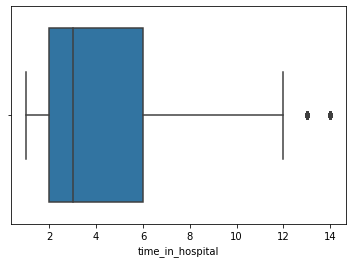

In [779]:
#detect outlier and skewness of the variable - time_in_hospital
#using boxplot
g1=sns.boxplot(df['time_in_hospital'])
plt.show()

In [780]:
#boxplot indicating there are outliers, further investigation by checking value counts
df['time_in_hospital'].value_counts()

3     9419
2     9019
1     7519
4     7195
5     5106
6     3727
7     2921
8     2029
9     1397
10    1022
11     807
12     609
13     546
14     427
Name: time_in_hospital, dtype: int64

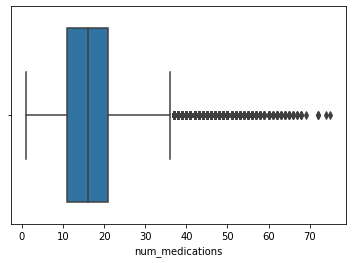

In [781]:
#detect outlier and skewness of the variable - num_medications
#using boxplot
g2=sns.boxplot(df['num_medications'].dropna())
plt.show()

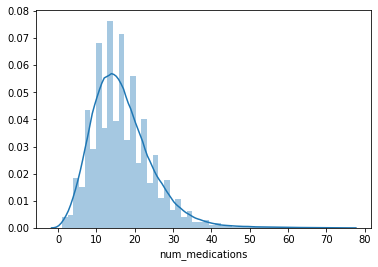

In [782]:
#detect outlier and skewness of the variable - num_medications
#using distribution plot
g3=sns.distplot(df['num_medications'].dropna())
plt.show()
# distribution plot indicating that 'num_medication' is positively skewed

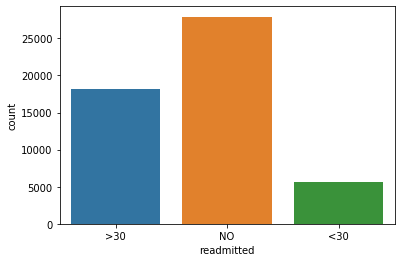

In [783]:
#detect outlier and skewness of the variable - readmitted
#using histogram
g4=sns.countplot(df['readmitted'].dropna())
plt.show()

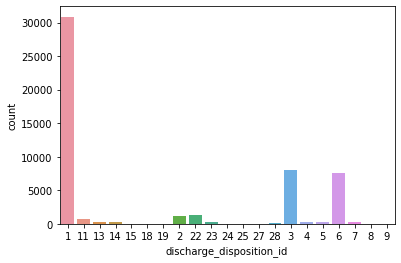

In [784]:
# detect outlier and skewness of the variable - discharge_disposition_id
# using histogram
g5=sns.countplot(data=df, x='discharge_disposition_id')
plt.show()

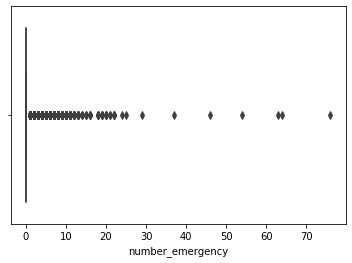

In [785]:
# detect outlier and skewness of the variable - number_emergency
# using boxplot
g6=sns.boxplot(df['number_emergency'])
plt.show()

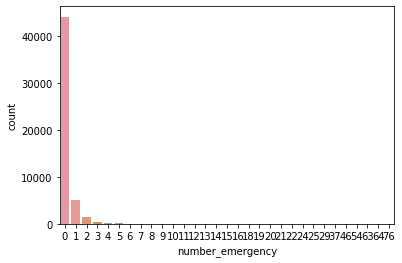

In [786]:
# detect outlier and skewness of the variable - number_emergency
# using histogram
g7=sns.countplot(data=df, x='number_emergency')
plt.show()

#plots indicating that 'number_emergency' is heavily skewed

In [787]:
df['number_emergency'].value_counts()

0     44142
1      5043
2      1398
3       493
4       242
5       147
6        67
7        49
8        34
10       26
9        23
11       20
13       11
12       10
18        5
20        4
19        4
16        4
22        4
14        3
15        3
21        2
64        1
63        1
37        1
29        1
46        1
54        1
24        1
25        1
76        1
Name: number_emergency, dtype: int64

## Q3.2
Determine if there is any relationship between num_medications and readmitted?
How do you handle these two variables in the data modelling if a relationship exists?

In [788]:
df['readmitted'].value_counts()

NO     27923
>30    18206
<30     5614
Name: readmitted, dtype: int64

In [789]:
# change readmitted into numerical 0/1/2 variable
readmitted_map = {'NO':0, '<30':1, '>30':2}
df['readmitted'] = df['readmitted'].map(readmitted_map)

In [790]:
# showing that readmitted has been transformed into numerical variable
df['readmitted'].value_counts()

0    27923
2    18206
1     5614
Name: readmitted, dtype: int64

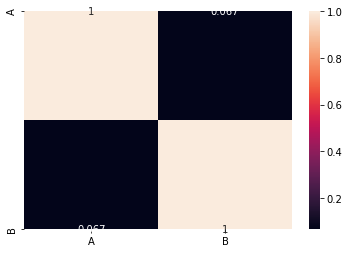

In [791]:
# creating a heatmap to detect if there is any relationship between num_medications and readmitted
A = df['readmitted'] #list of values for A
B = df['num_medications'] #list of values for B

df_heatmap = pd.DataFrame({'A': A,
                   'B': B})

corr = df_heatmap.corr(method = 'spearman')

sns.heatmap(corr, annot = True)

plt.show()

As shown in the heat map, there is no significant relationship between 'readmitted' and 'num_medications'.

## Q3.3
Identify the highly correlated variable pairs and elaborate on how to treat these variables in the mining process in such a case

In [792]:
df['race'].value_counts()

Caucasian          41389
AfricanAmerican     8068
Hispanic            1016
Other                892
Asian                378
Name: race, dtype: int64

In [793]:
df['gender'].value_counts()

Female    27708
Male      24035
Name: gender, dtype: int64

In [794]:
df['age'].value_counts()
#result shows that age has already been mapped in the previous analysis

7    12969
6    11612
8     9670
5     8479
4     4619
3     1717
9     1616
2      815
1      223
0       23
Name: age, dtype: int64

In [795]:
df['A1Cresult'].value_counts()

None    42341
>8       3854
Norm     3298
>7       2250
Name: A1Cresult, dtype: int64

In [796]:
df['insulin'].value_counts()

No        21634
Steady    14857
Down       7631
Up         7621
Name: insulin, dtype: int64

In [797]:
#change race into numerical variable
race_map = {'Caucasian':0, 'AfricanAmerican':1, 'Hispanic':2, 'Asian':3, 'Other':4}
df['race'] = df['race'].map(race_map)

#change gender into numerical variable
gender_map = {'Female':0, 'Male':1}
df['gender'] = df['gender'].map(gender_map)

#change A1Cresult into numerical variable
A1Cresult_map = {'None':0, 'Norm':1, '>7':2,'>8':3}
df['A1Cresult'] = df['A1Cresult'].map(A1Cresult_map)

#change insulin dosage change into numerical variable
insulin_map = {'No':0, 'Steady':1, 'Down':2,'Up':3}
df['insulin'] = df['insulin'].map(insulin_map)

In [798]:
#selecting columns that has a numerical data type
dfnum = df.select_dtypes(include=[np.number])
dfnum

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,A1Cresult,insulin,change,diabetesMed,readmitted
0,0,0,6,4,43,0,13,1,0,0,9,0,1,0,0,2
1,0,0,8,8,48,6,26,0,0,1,9,1,2,1,0,2
2,0,0,8,2,39,0,9,0,0,0,9,0,0,0,1,0
3,0,0,6,2,54,0,11,0,0,0,3,1,0,0,1,0
4,0,0,6,7,70,1,20,1,0,1,6,0,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51760,1,0,6,6,45,1,25,3,1,2,9,0,2,1,0,2
51761,1,1,7,3,51,0,16,0,0,0,9,3,2,1,0,2
51762,1,0,8,5,33,3,18,0,0,1,9,0,1,0,0,0
51763,0,1,7,1,53,0,9,1,0,0,13,0,2,1,0,0


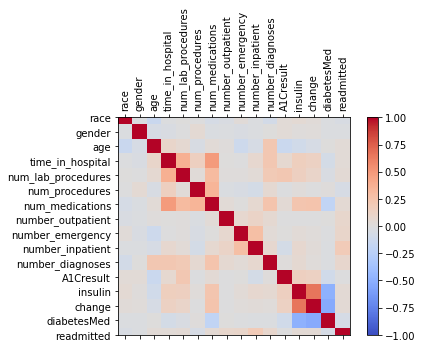

In [799]:
#creating a correlation matrix
corr = dfnum.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin= -1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dfnum.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation =90)
ax.set_yticks(ticks)
ax.set_xticklabels(dfnum.columns)
ax.set_yticklabels(dfnum.columns)
plt.show()